# Preprocessing

In [54]:
# Imports & stuff

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.colors as cls
from cycler import cycler
from scipy.signal import savgol_filter

# Constants
time = 3600
discount = 0.95
pres_sarsop = []
pres_ub = []
# all_envs = ["ABC", "Tiger", "RockSample5", "RockSample10", "K-out-of-N2", "K-out-of-N3", 
#             "FrozenLake4", "FrozenLake10", "Tag", "Hallway1", "Hallway2", "MiniHallway", "TigerGrid"] # All envs
all_envs = ["ABC", "Tiger","grid", "RockSample5", "RockSample10", "K-out-of-N2", "K-out-of-N3","aloha30",
             "Tag",  "SparseTigerGrid","SparseHallway1", "SparseHallway2", "pentagon", "fourth"  ]
# Missing: "sunysb", "fourth" (Never run) & 

# all_envs = ["ABC", "Tiger", "RockSample5", "K-out-of-N2", "K-out-of-N3", 
#             "FrozenLake4", "FrozenLake10", "Tag",  "SparseHallway1", "SparseHallway2", "SparseTigerGrid"] # Messing around...
Env_to_latex_name = {
    "ABC" : "\\custom",
    "Tiger":"\\tiger",
    "RockSample5": "\\rocksample (5)",
    "RockSample10": "\\rocksample (10)",
    "K-out-of-N2":"\\koutofn (2)",
    "K-out-of-N3":"\\koutofn (3)",
    "FrozenLake4":"\\lake (4)",
    "FrozenLake10":"\\lake (10)",
    "Tag":"\\tagenv",
    "Hallway1":"\\hallway1",
    "Hallway2":"\\hallway2",
    "TigerGrid":"\\tigergrid",
    "Sparse_Hallway1":"\\hallwayone",
    "Sparse_Hallway2":"\\hallwaytwo",
    "SparseHallway1":"\\hallwayone",
    "SparseHallway2":"\\hallwaytwo",
    "SparseTigerGrid":"\\tigergrid",
    "MiniHallway":"\\minihallway",
    "aloha10":"\\aloha (10)", 
    "aloha30":"\\aloha (30)", 
    "cit":"\\cit", 
    "fourth":"\\fourth", 
    "mit":"\\mit", 
    "pentagon":"\\pentagon", 
    "sunysb":"\\sunysb", 
    "grid":"\\gridenv"
}

solver_to_heuristic = {
    "SARSOP" : "FIB",
    "BIB-SARSOP" : "BIB",
    "EBIB-SARSOP" : "EBIB"
}



# all_envs = ["ABC", "Tiger", "RockSample5", "FrozenLake4"] #Testing envs
# all_envs = ["ABC", "Tiger", "RockSample5", "FrozenLake4", "FrozenLake10", "K-out-of-N3"] #Testing envs
pre_sarsop = "./Data/SarsopTest/Sarsoptest_"
pre_ub = "./Data/UpperBounds/UpperBoundTest_"
post_sarsop = f"_t{time}_d{str(discount)[2:]}_OnlyBs.json"
# post_sarsop = f"_t{time}_d{str(discount)[2:]}.json"
post_ub =f"_d{str(discount)[2:]}.json"
for env in all_envs:
    pres_ub.append(pre_ub + env + "_")

# solvers = ["SARSOP", "BIB-SARSOP", "EBIB-SARSOP"]
solvers = ["SARSOP", "BIB-SARSOP", "EBIB-SARSOP"]
# solvers = ["SARSOP", "BIB-SARSOP"]

def get_data_plot(env:str):
    ts, ubs, lbs = [], [], []
    solvernames, envname = [], ""
    for s in solvers:
        filename = pre_sarsop+env+"_"+s+post_sarsop
        with open(filename) as file:
            data = json.load(file)
            ts.append(data["times"])
            ubs.append(data["ubs"])
            lbs.append(data["lbs"])
            solvernames.append(data["solver"])
            envname = data["env_full"]

    return ts, ubs, lbs, solvernames, envname


def get_data_discounts(env, discounts):
    times, init_times = [], []
    solvernames = []
    for (s_idx, s) in enumerate(solvers):
        solvernames.append(s)
        times.append([])
        init_times.append([])
        for d in discounts:
            filename = f'./Data/DiscountTest/Sarsoptest_{env}_{s}_t{time}_d{str(round(d, 4))[2:]}.json'
            with open(filename) as file:
                data = json.load(file)
                times[s_idx].append(data["runtime"])
                init_times[s_idx].append(data["times"][0])

    return times, init_times, solvernames


def size_to_string(size:int):
    if size < 1000:
        return str(size)
    elif size < 10_000:
        return f'{(size/1_000):.1f}k'
    return f'{(size/1_000):.0f}k'

def value_to_string(nmbr:float):
    if abs(nmbr) < 10:
        return f'{nmbr:.2f}'
    elif abs(nmbr) < 100:
        return f'{nmbr:.1f}'
    else:
        return f'{nmbr:.0f}'
    
def time_to_string(nmbr:float):
    if nmbr < 0.1:
        return "<0.1s"
    elif nmbr < 100:
        return f'{nmbr:.1f}s'
    elif nmbr < 1200:
        return f'{nmbr:.0f}s'
    else:
        return "TO"



# Tables

## SARSOP - Large & Small

In [62]:
# SARSOP Convergence test - Large

def get_valuebounds_sarsop(data:dict, tmax, addAnd=False):
    times, ubs, lbs = data["times"], data["ubs"], data["lbs"]
    for (i, t) in enumerate(times):
        if t > tmax:
            if i == 0:
                return "N/A"
            # diff = abs(( ubs[i] - lbs[i]) / ubs[i])
            diff = f'{abs(( ubs[i-1] - lbs[i-1]) / lbs[i-1]):.2f}'
            break
            # return f'{lbs[i-1]:.2f}, {ubs[i-1]:.2f} '
    # diff = abs(( data["final_ub"] - data["final_lw"]) / data["final_ub"])
    # diff = abs(( data["final_ub"] - data["final_lw"]) / data["final_lb"])
    if addAnd:
        diff = "& "+diff
    return diff


# labels = ["\\SARSOP", "\\BIBSARSOP", "\\EBIBSARSOP"]
# labels = ["\\FIB", "", "\\BIB","", "\\EBIB",""]
# labels = ["900s", "1800s", "3600s", "900s", "1800s", "3600s","900s", "1800s", "3600s"]
labels = ["\\FIB", "\\BIB", "\\EBIB","\\FIB", "\\BIB", "\\EBIB","\\FIB", "\\BIB", "\\EBIB"]
# labels = ["15 min", "30 min", "60 min","15 min", "30 min", "60 min","15 min", "30 min", "60 min",]
names = []
Data = []
for _l in labels:
    Data.append([])


times = [600, 1200, 3600]

for env in all_envs:
    pres_sarsop.append(pre_sarsop + env + "_" )
# envs_sarsop = ["RockSample10","K-out-of-N3", "Tag","SparseHallway1", "SparseHallway2","SparseTigerGrid",
#                "cit", "fourth", "mit", "pentagon", "grid"]
envs_sarsop = ["grid","RockSample10","K-out-of-N3", "Tag","SparseTigerGrid", 
               "Sparse_Hallway1", "Sparse_Hallway2", "pentagon", "fourth",  ]

for env in envs_sarsop:
    thispre = pre_sarsop + env + "_"
    filename_Sarsop = thispre + "SARSOP" + post_sarsop
    # print(pre)
    with open(filename_Sarsop) as file:
        this_data = json.load(file)
        names.append(Env_to_latex_name[this_data["env"]])
        Data[0].append(get_valuebounds_sarsop(this_data, times[0], addAnd=True))
        Data[3].append(get_valuebounds_sarsop(this_data, times[1], addAnd=True))
        Data[6].append(get_valuebounds_sarsop(this_data, times[2], addAnd=True))

    filename_BibSarsop = thispre + "BIB-SARSOP" + post_sarsop
    with open(filename_BibSarsop) as file:
        this_data = json.load(file)
        Data[1].append(get_valuebounds_sarsop(this_data, times[0]))
        Data[4].append(get_valuebounds_sarsop(this_data, times[1]))
        Data[7].append(get_valuebounds_sarsop(this_data, times[2]))

    filename_EBibSarsop = thispre + "EBIB-SARSOP" + post_sarsop
    with open(filename_EBibSarsop) as file:
        this_data = json.load(file)
        Data[2].append(get_valuebounds_sarsop(this_data, times[0]))
        Data[5].append(get_valuebounds_sarsop(this_data, times[1]))
        Data[8].append(get_valuebounds_sarsop(this_data, times[2]))

# dataframe = pd.DataFrame([Sarsop_lb, Sarsop_ub, BibSarsop_lb, BibSarsop_ub,EBibSarsop_lb, EBibSarsop_ub,], index=labels, columns=names).transpose()

dataframe = pd.DataFrame(Data, index=labels, columns=names).transpose()


print(dataframe)

print(dataframe.to_latex(column_format="l||rrr|rrr|rrr"))

                    \FIB  \BIB \EBIB    \FIB  \BIB \EBIB    \FIB  \BIB \EBIB
\gridenv          & 0.15  0.14  0.07  & 0.11  0.11  0.06  & 0.09  0.08  0.05
\rocksample (10)  & 0.04  0.03  0.03  & 0.03  0.03  0.03  & 0.02  0.01  0.02
\koutofn (3)      & 0.21  0.11  0.11  & 0.19  0.10  0.10  & 0.18  0.09  0.10
\tagenv           & 0.44  0.41  0.40  & 0.43  0.40  0.40  & 0.42  0.38  0.38
\tigergrid        & 0.11  0.08  0.09  & 0.11  0.08  0.08  & 0.10  0.08  0.08
\hallwayone       & 0.21  0.16  0.17  & 0.21  0.16  0.16  & 0.21  0.15  0.15
\hallwaytwo       & 1.77  1.51   N/A  & 1.67  1.47  1.54  & 1.58  1.36  1.37
\pentagon         & 0.18  0.14   N/A  & 0.15  0.10  0.15  & 0.12  0.08  0.12
\fourth           & 0.70  1.01   N/A  & 0.58  0.65   N/A  & 0.44  0.41   N/A
\begin{tabular}{l||rrr|rrr|rrr}
\toprule
 & \FIB & \BIB & \EBIB & \FIB & \BIB & \EBIB & \FIB & \BIB & \EBIB \\
\midrule
\gridenv & & 0.15 & 0.14 & 0.07 & & 0.11 & 0.11 & 0.06 & & 0.09 & 0.08 & 0.05 \\
\rocksample (10) & & 0.04 & 0

In [57]:
# SARSOP Convergence test - Small

def get_time_per_iter(data:dict):
    if len(data["times"]) == 1:
        return "N/A"
    avg_time = (data["runtime"] - data["times"][0]) / (len(data["times"])-1)
    return f'{avg_time:.2e}s'

def get_perc_heuristic_time(data:dict):
    return (data["times"][0] / data["runtime"])

# labels = ["\\FIB", "", "\\BIB","", "\\EBIB","", "\\OBIB",""]
labels = ["\\FIB", "\\BIB","\\EBIB"]
# labels = ["T", "N_E","T", "N_E","T", "N_E", ]
names = []

Data = []
for _l in labels:
    Data.append([])

envs_sarsop = ["ABC","Tiger", "RockSample5", "K-out-of-N2", "aloha30"]
# envs_sarsop = ["ABC","Tiger", "RockSample5", "FrozenLake4"]

for env in all_envs:
    pres_sarsop.append(pre_sarsop + env + "_" )



for env in envs_sarsop:
    thispre = pre_sarsop + env + "_"
    filename_Sarsop = thispre + "SARSOP" + post_sarsop
    with open(filename_Sarsop) as file:
        this_data = json.load(file)
        names.append(Env_to_latex_name[this_data["env"]])
        Data[0].append(f'& {time_to_string(this_data["runtime"])}')
        # Data[1].append(len(this_data["times"])-1)
        # Data[1].append(get_perc_heuristic_time(this_data))


    filename_BibSarsop = thispre + "BIB-SARSOP" + post_sarsop
    with open(filename_BibSarsop) as file:
        this_data = json.load(file)
        Data[1].append(f'& {time_to_string(this_data["runtime"])}')
        # Data[3].append(len(this_data["times"])-1)
        # Data[3].append(get_perc_heuristic_time(this_data))

    filename_EBibSarsop = thispre + "EBIB-SARSOP" + post_sarsop
    with open(filename_EBibSarsop) as file:
        this_data = json.load(file)
        Data[2].append(f'& {time_to_string(this_data["runtime"])}')
        # Data[5].append(len(this_data["times"])-1)
        # Data[5].append(get_perc_heuristic_time(this_data))

    # filename_EBibSarsop = thispre + "WBIB-SARSOP" + post_sarsop
    # with open(filename_EBibSarsop) as file:
    #     this_data = json.load(file)
    #     Data[6].append(f'{this_data["runtime"]:.2f}s')
    #     Data[7].append(len(this_data["times"])-1)



print(Data)
# dataframe = pd.DataFrame([Sarsop_lb, Sarsop_ub, BibSarsop_lb, BibSarsop_ub,EBibSarsop_lb, EBibSarsop_ub,], index=labels, columns=names).transpose()

dataframe = pd.DataFrame( Data, index=labels, columns=names).transpose()


print(dataframe)

print(dataframe.to_latex(column_format="lcrcrcr"))

[['& <0.1s', '& 0.1s', '& 0.8s', '& 515s', '& 31.7s'], ['& <0.1s', '& <0.1s', '& 0.8s', '& 67.2s', '& 33.5s'], ['& <0.1s', '& <0.1s', '& 0.9s', '& 71.0s', '& 1017s']]
                    \FIB     \BIB    \EBIB
\custom          & <0.1s  & <0.1s  & <0.1s
\tiger            & 0.1s  & <0.1s  & <0.1s
\rocksample (5)   & 0.8s   & 0.8s   & 0.9s
\koutofn (2)      & 515s  & 67.2s  & 71.0s
\aloha (30)      & 31.7s  & 33.5s  & 1017s
\begin{tabular}{lcrcrcr}
\toprule
 & \FIB & \BIB & \EBIB \\
\midrule
\custom & & <0.1s & & <0.1s & & <0.1s \\
\tiger & & 0.1s & & <0.1s & & <0.1s \\
\rocksample (5) & & 0.8s & & 0.8s & & 0.9s \\
\koutofn (2) & & 515s & & 67.2s & & 71.0s \\
\aloha (30) & & 31.7s & & 33.5s & & 1017s \\
\bottomrule
\end{tabular}



## Upper bounds

In [60]:
# Upper bounds

def get_vars_ub(data:dict):
    if data["solver"] == "SARSOP":
        # return f'{data["ub"]:.2f}, ({data["solvetime"]:.1f}s)'
        if data["solvetime"] < 1200:
            return f'{data["ub"]:.2f}'
        else:
            return f'\\uline{{{data["ub"]:.2f}}}'
    else:
        if data["solvetime"] > 1200:
            return "TO"
        else:
            t = f'{data["solvetime"]:.1f}s'
        return f'{data["ub"]:.2f} ({t})'

heuristic_names = ["SARSOP", "FIB", "BIB", "EBIB", "WBIB"]
# heuristic_names = ["FIB", "BIB", "EBIB", "SARSOP"]
labels = ["","$|\\states|$", "$|\\actions|$", "$|\\observations|$", "$|\\Bsao|$",  "$|\\Bbao|$"]   # SARSOP]


for _h in range(len(heuristic_names)):
    labels.extend(["","$\\bar{V}$", "$t$"])                                                                                 

# heuristic_names = ["FIB", "BIB", "EBIB", "SARSOP"]
# labels = ["\\FIB", "\\BIB", "\\EBIB", "\\SARSOP"]
env_names, S, A, O, Bsao, Bbao = [], [], [], [], [], []
bounds = []
times = []
for _h in heuristic_names:
    bounds.append([])
    times.append([])
for _e in pres_ub:
    env_names.append("")
    S.append(""); A.append("");O.append("")
    Bsao.append(""); Bbao.append("")

empty = np.repeat("", len(pres_ub))

for (heur_idx, name) in enumerate(heuristic_names):
    for (env_idx, thispre) in enumerate(pres_ub):
        
        filename = thispre + name + post_ub
        try:
            with open(filename) as file:               
                this_data = json.load(file)
                env_names[env_idx] = Env_to_latex_name[this_data["env"]]
                S[env_idx] = size_to_string(this_data["env_data"]["ns"])
                A[env_idx] = size_to_string(this_data["env_data"]["na"])
                O[env_idx] = size_to_string(this_data["env_data"]["no"])
                Bsao[env_idx] = size_to_string(this_data["env_data"]["nb"])
                Bbao[env_idx] = size_to_string(this_data["env_data"]["nbao"])

                ub = value_to_string(this_data["ub"])
                if name == "SARSOP" and this_data["solvetime"] < 1200:
                    bounds[heur_idx].append(f'\\underline{{{ub}}}')
                else:
                    bounds[heur_idx].append(ub)
                # elif this_data["solvetime"] > 1200:
                #     bounds[heur_idx].append('-')

                times[heur_idx].append(time_to_string(this_data["solvetime"]))
        except:
            print("Error in ", filename, "!!!")
            bounds[heur_idx].append('-')
            times[heur_idx].append("TO")

print(np.shape(bounds))
print(np.shape(env_names))
print(np.shape(labels))

data = [empty, S, A, O, Bsao, Bbao, empty, bounds[0], times[0],empty, bounds[1], times[1],empty,bounds[2], times[2],empty,bounds[3], times[3],empty,bounds[4], times[4]]
# data = [S, A, O, Bsao, Bbao, bounds[3], bounds[0], times[0], bounds[1], times[1], bounds[2], times[2]]

print(data)

dataframe = pd.DataFrame( data, index=labels, columns=env_names).transpose()

print(dataframe)

print(dataframe.to_latex(column_format="l||rrrrr||r|rcrrcrrcrrcr"))

Error in  ./Data/UpperBounds/UpperBoundTest_grid_WBIB_d95.json !!!
Error in  ./Data/UpperBounds/UpperBoundTest_aloha30_WBIB_d95.json !!!
Error in  ./Data/UpperBounds/UpperBoundTest_pentagon_WBIB_d95.json !!!
Error in  ./Data/UpperBounds/UpperBoundTest_fourth_WBIB_d95.json !!!
(5, 14)
(14,)
(21,)
[array(['', '', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype='<U1'), ['6', '2', '36', '201', '1.6k', '16', '64', '90', '842', '36', '60', '92', '212', '1.1k'], ['3', '3', '5', '8', '9', '9', '27', '29', '5', '5', '5', '5', '4', '4'], ['1', '2', '36', '3', '3', '16', '64', '90', '30', '17', '21', '17', '212', '1.1k'], ['11', '3', '152', '202', '1.6k', '61', '496', '2.5k', '2.4k', '1.4k', '2.2k', '3.4k', '6.0k', '29k'], ['15', '5', '722', '210', '1.6k', '232', '4.8k', '202k', '6.3k', '100k', '147k', '229k', '447k', '2125k'], array(['', '', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype='<U1'), ['\\underline{0.47}', '\\underline{19.4}', '6.42', '\\underline{16.9}', '1

# Plotting

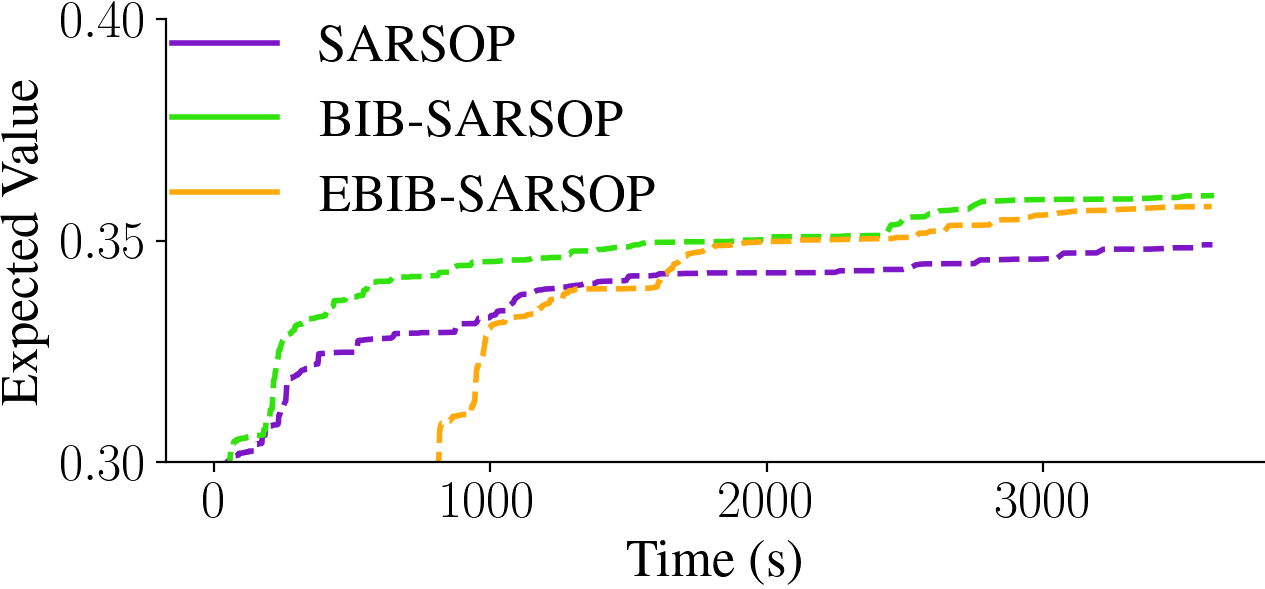

In [20]:
# colours =  ['#E24A33', '#348ABD',  '#FBC15E', '#8EBA42', '#FFB5B8']
colours = ["#7C16C6","#31E20C", "#FFA90D", "#F90D24",  "#FFF90D"]


ts, ubs, lbs, solvernames, envname = get_data_plot("Sparse_Hallway2")

for (i,label) in enumerate(solvernames):
    plt.plot(ts[i][1:],ubs[i][1:], label=label, color=colours[i], linestyle="-")
    plt.plot(ts[i][1:],lbs[i][1:], label=None, color=colours[i], linestyle="--")
    # x,y  = ts[i][-1], (ubs[i][-1] + lbs[i][-1])/2
    # plt.plot(x,y, marker="o", markersize=15, label=None, color=colours[i])
    # x,y  = ts[i][-1], lbs[i][-1]
    # plt.plot(x,y, marker="X", markersize=10, label=None, color=colours[i])

plt.xlabel("Time (s)")
plt.ylabel("Expected Value")

plt.ylim(0.3, 0.4)
# plt.xlim(0,1000)
plt.legend()
plt.show()

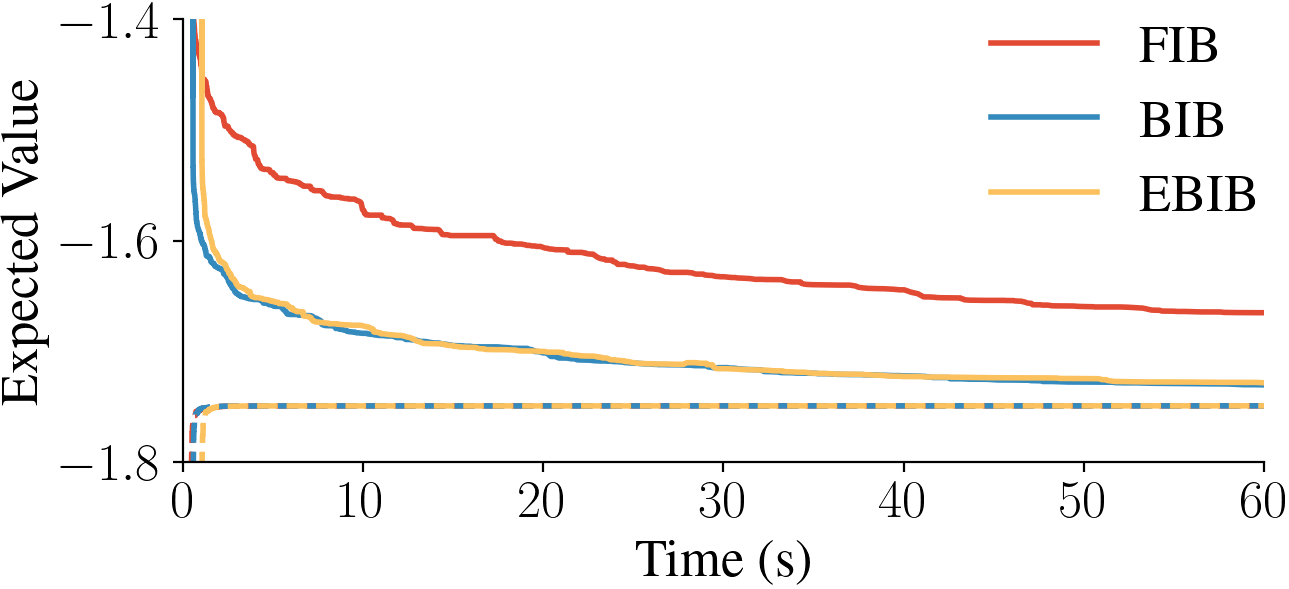

In [21]:
colours =  ['#E24A33', '#348ABD',  '#FBC15E', '#8EBA42', '#FFB5B8']
filename = "Data/Figures/SarsopTest_K-out-of-N2.pdf"


ts, ubs, lbs, solvernames, envname = get_data_plot("K-out-of-N2")

for (i,label) in enumerate(solvernames):
    label = solver_to_heuristic[label]
    plt.plot(ts[i],ubs[i], label=label, color=colours[i], linestyle="-")
    plt.plot(ts[i],lbs[i], label=None, color=colours[i], linestyle="--")
    # x,y  = ts[i][-1], (ubs[i][-1] + lbs[i][-1])/2
    # plt.plot(x,y, marker="o", markersize=15, label=None, color=colours[i])
    # x,y  = ts[i][-1], lbs[i][-1]
    # plt.plot(x,y, marker="X", markersize=10, label=None, color=colours[i])

plt.xlabel("Time (s)")
plt.ylabel("Expected Value")

plt.ylim(-1.8, -1.4)
plt.xlim(0,60)
plt.legend()
plt.savefig(filename, transparent=True)
plt.show()

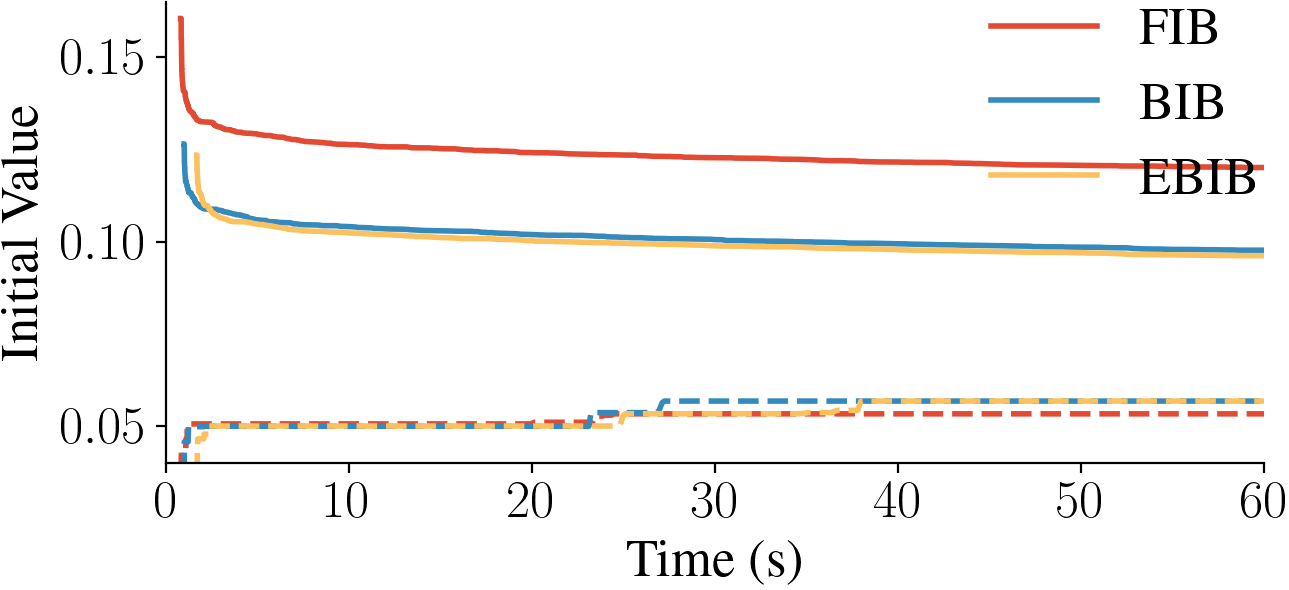

In [22]:
# K-out-of-N2

filename = "Data/Figures/SarsopTest_FrozenLake10.pdf"
ts, ubs, lbs, solvernames, envname = get_data_plot("FrozenLake10")

for (i,solver) in enumerate(solvernames):
    label = solver_to_heuristic[solver]
    # label = solver
    plt.plot(ts[i],ubs[i], label=label, color=colours[i], linestyle="-")
    plt.plot(ts[i],lbs[i], label=None, color=colours[i], linestyle="--")
    # x,y  = ts[i][-1], (ubs[i][-1] + lbs[i][-1])/2
    # plt.plot(x,y, marker="o", markersize=15, label=None, color=colours[i])
    # x,y  = ts[i][-1], lbs[i][-1]
    # plt.plot(x,y, marker="X", markersize=10, label=None, color=colours[i])

plt.xlabel("Time (s)")
plt.ylabel("Initial Value")

plt.ylim(0.04, 0.165)
plt.xlim(0, 60)
plt.legend()
plt.savefig(filename, transparent=True)
plt.show()


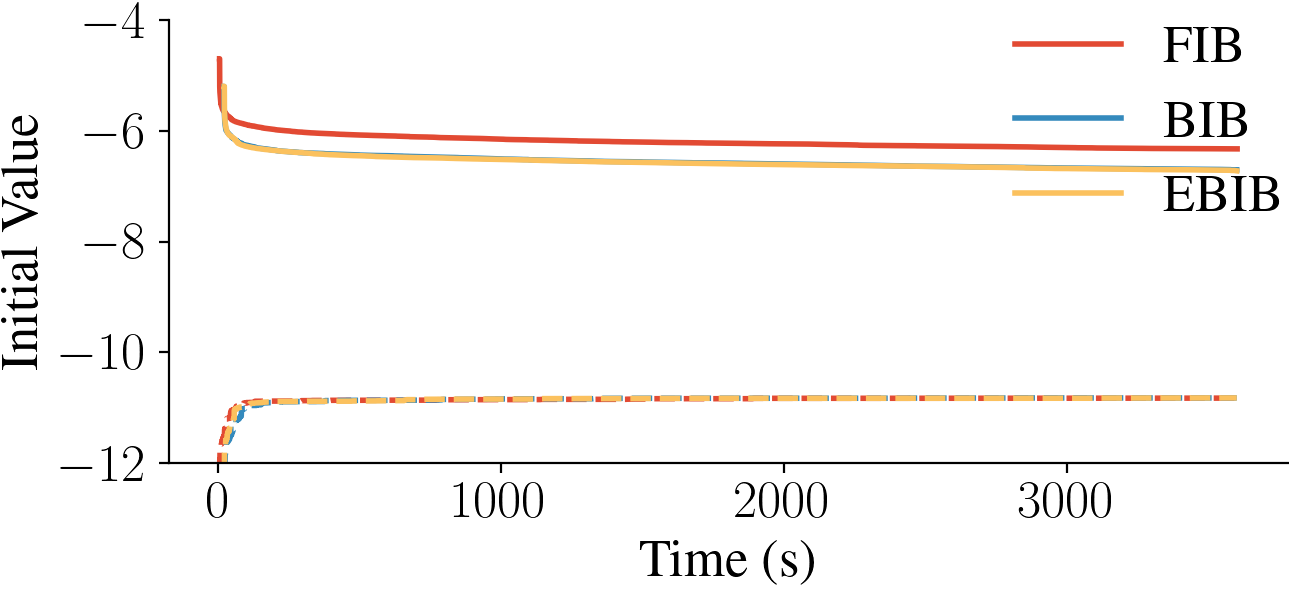

In [23]:
# K-out-of-N2

filename = "Data/Figures/SarsopTest_FrozenLake10.pdf"
ts, ubs, lbs, solvernames, envname = get_data_plot("Tag")

for (i,solver) in enumerate(solvernames):
    label = solver_to_heuristic[solver]
    # label = solver
    plt.plot(ts[i],ubs[i], label=label, color=colours[i], linestyle="-")
    plt.plot(ts[i],lbs[i], label=None, color=colours[i], linestyle="--")
    # x,y  = ts[i][-1], (ubs[i][-1] + lbs[i][-1])/2
    # plt.plot(x,y, marker="o", markersize=15, label=None, color=colours[i])
    # x,y  = ts[i][-1], lbs[i][-1]
    # plt.plot(x,y, marker="X", markersize=10, label=None, color=colours[i])

plt.xlabel("Time (s)")
plt.ylabel("Initial Value")

plt.ylim(-12, -4)
# plt.xlim(0, 60)
plt.legend()
plt.savefig(filename, transparent=True)
plt.show()

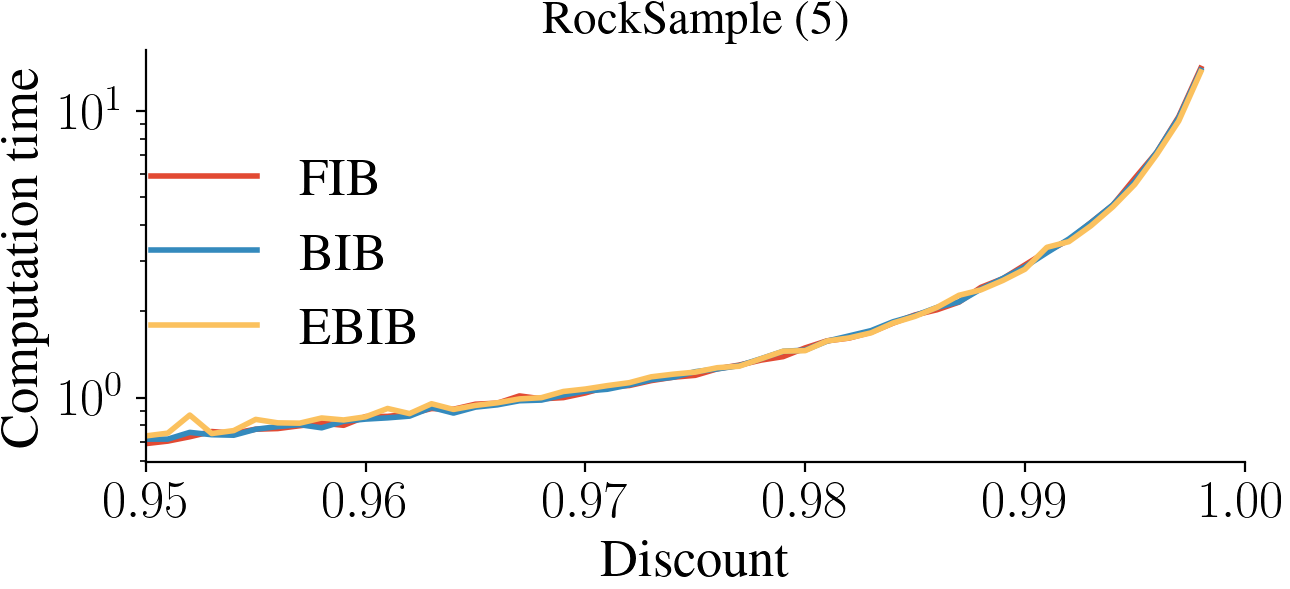

In [24]:
# FrozenLake5
filename = "Data/Figures/DiscountTest_RockSample5.pdf"
discounts = np.arange(0.95, 0.998, 0.001)
times, init_times, snames = get_data_discounts("RockSample5", discounts)

solvernames = ["FIB", "BIB", "EBIB"]

# plt.axhline(y=3600, label="TO", linestyle="--", color="0.5")

for (i,solver) in enumerate(solvernames):
    plt.plot(discounts,times[i], label=solver, color=colours[i], linestyle="-")

# Swithc TO to last on legend
handles, labels = plt.gca().get_legend_handles_labels()
# to_index = labels.index("TO")
# handles.append(handles.pop(to_index))
# labels.append(labels.pop(to_index))

plt.yscale("log")
plt.xlabel("Discount")
plt.ylabel("Computation time")

plt.xlim(0.95, 1)
plt.legend(handles, labels, loc='center left')
plt.title("RockSample (5)")
plt.savefig(filename, transparent=True)
plt.show()

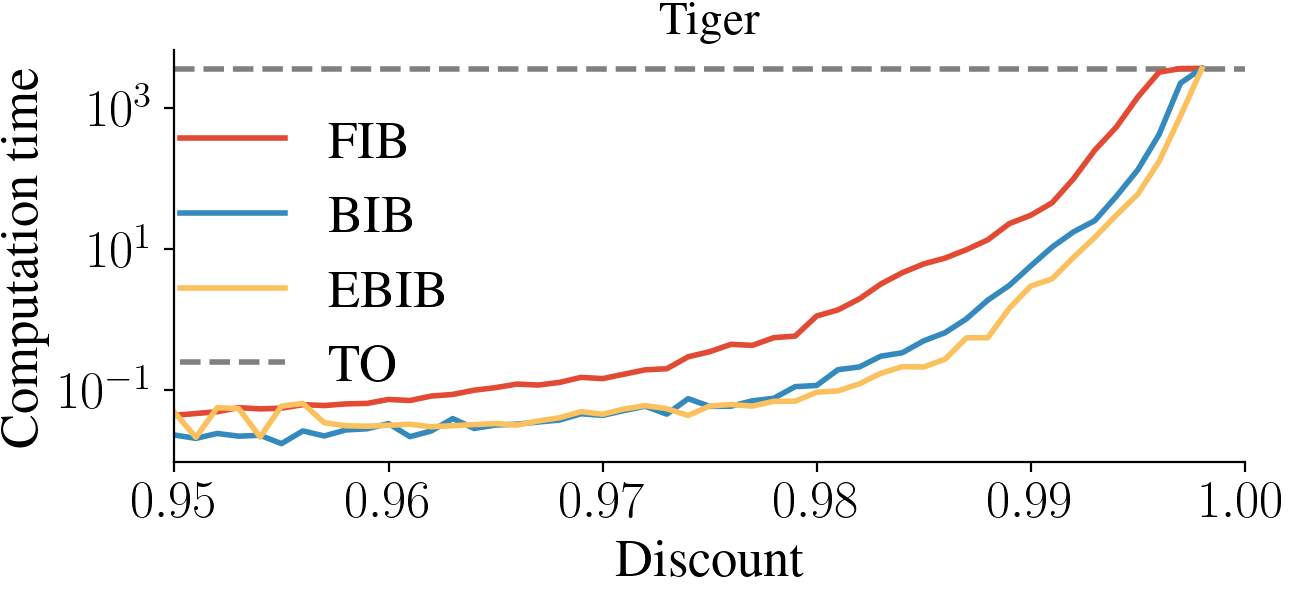

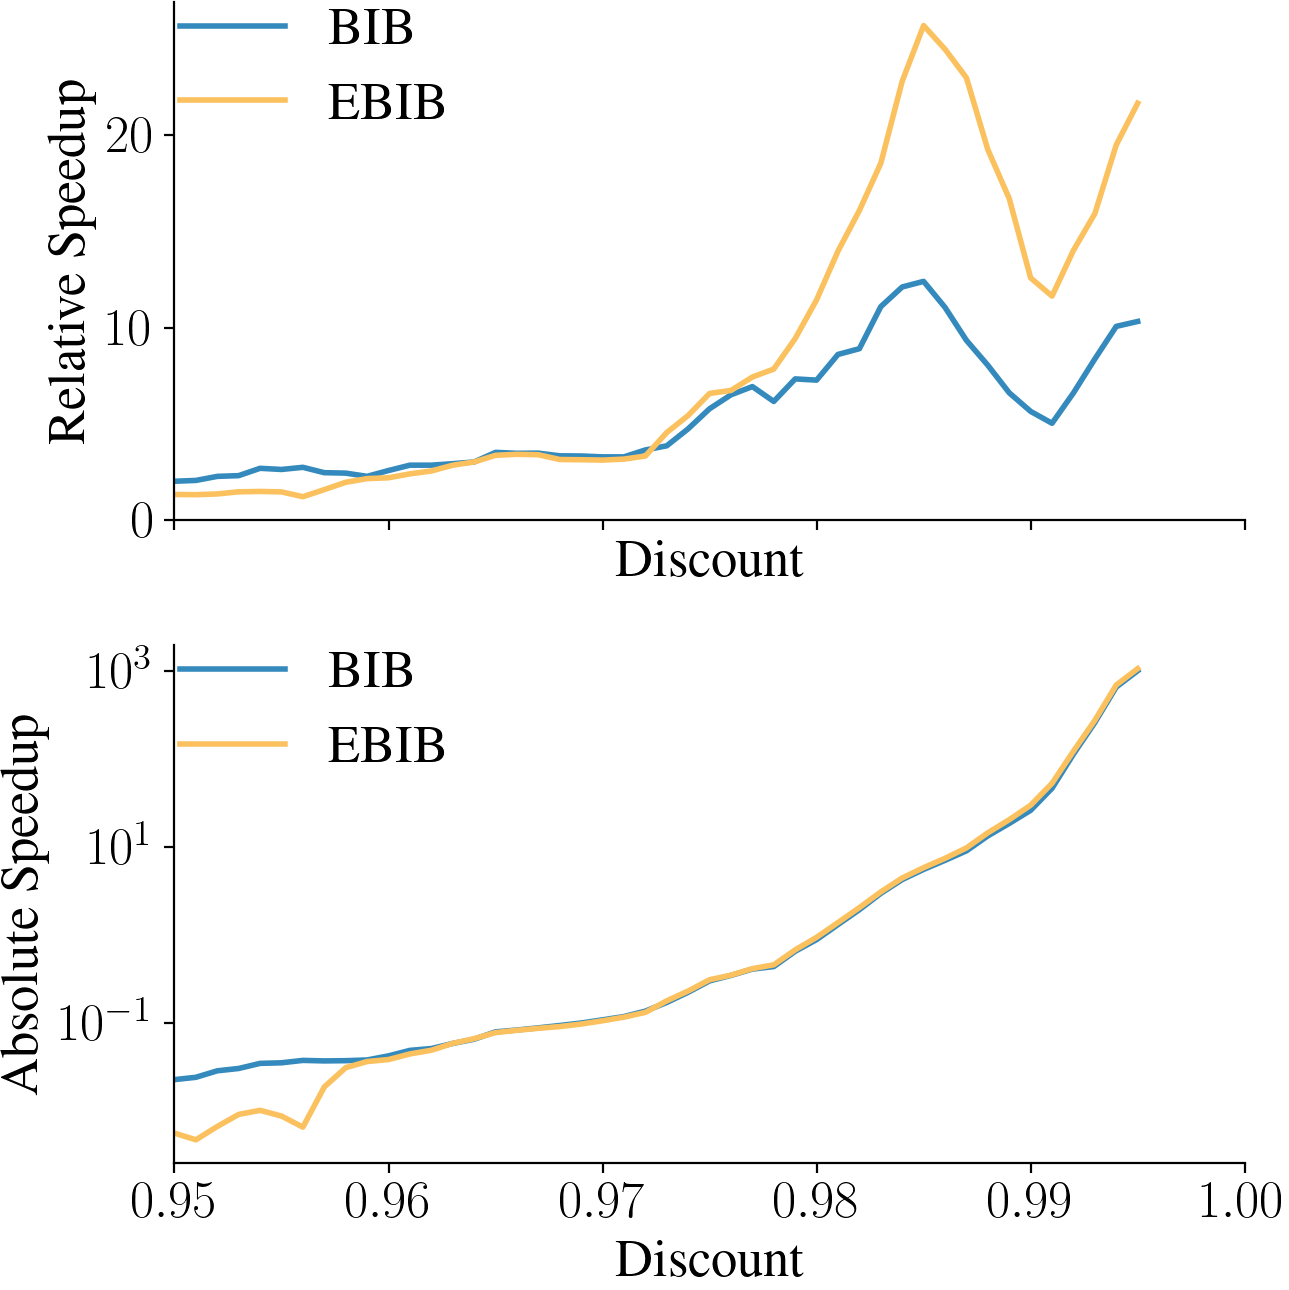

In [25]:
# Tiger
filename = "Data/Figures/DiscountTest_Tiger.pdf"
discounts = np.arange(0.95, 0.998, 0.001)
times, init_times, snames = get_data_discounts("Tiger", discounts)

solvernames = ["FIB", "BIB", "EBIB"]

plt.axhline(y=3600, label="TO", linestyle="--", color="0.5")

for (i,solver) in enumerate(solvernames):
    plt.plot(discounts,times[i], label=solver, color=colours[i], linestyle="-")

# Swithc TO to last on legend
handles, labels = plt.gca().get_legend_handles_labels()
to_index = labels.index("TO")
handles.append(handles.pop(to_index))
labels.append(labels.pop(to_index))

plt.yscale("log")
plt.xlabel("Discount")
plt.ylabel("Computation time")

plt.xlim(0.95, 1)
plt.legend(handles, labels, loc='center left')
plt.title("Tiger")
plt.savefig(filename, transparent=True)
plt.show()

# cut out part where FIB times out:
for i in range(len(times)):
    times[i] = times[i][:-3]

discounts = discounts[:-3]


speedup_rel_BIB = savgol_filter(np.divide(times[0], times[1]), window_length=3, polyorder=0, mode="nearest")
speedup_rel_EBIB = savgol_filter(np.divide(times[0], times[2]), window_length=3, polyorder=0, mode="nearest")
speedup_abs_BIB = savgol_filter(np.subtract(times[0], times[1]), window_length=3, polyorder=0, mode="nearest")
speedup_abs_EBIB = savgol_filter(np.subtract(times[0], times[2]), window_length=3, polyorder=0, mode="nearest")
# plt.xlim(0.95, 1)
# # plt.ylim(0,25)
# plt.plot(discounts,speedup_rel_BIB, color=colours[1], linestyle="-", label="BIB")
# plt.plot(discounts,speedup_rel_EBIB, color=colours[2], linestyle="-", label="EBIB")
# plt.legend(loc="upper left")
# plt.xlabel("Discount")
# plt.ylabel("Relative Speedup")
# plt.savefig("Data/Figures/DiscountTest_Tiger_relspeedup.pdf")
# plt.show()
# plt.xlim(0.95, 1)
# # plt.ylim(0,1000)
# plt.plot(discounts,speedup_abs_BIB, color=colours[1], linestyle="-", label="BIB")
# plt.plot(discounts,speedup_abs_EBIB, color=colours[2], linestyle="-", label="EBIB")
# plt.legend(loc="upper left")
# plt.xlabel("Discount")
# plt.ylabel("Absolute Speedup")
# plt.yscale("log")
# plt.savefig("Data/Figures/DiscountTest_Tiger_absspeedup.pdf")
# plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

# First subplot: Relative Speedup
ax1.set_xlim(0.95, 1)
ax1.plot(discounts, speedup_rel_BIB, color=colours[1], linestyle="-", label="BIB")
ax1.plot(discounts, speedup_rel_EBIB, color=colours[2], linestyle="-", label="EBIB")
ax1.legend(loc="upper left")
# ax1.set_yscale("log")
ax1.set_xlabel("Discount")
ax1.set_ylabel("Relative Speedup")
# ax1.set_title("Relative Speedup vs Discount")  # Optional title for clarity

# Second subplot: Absolute Speedup
ax2.set_xlim(0.95, 1)
ax2.plot(discounts, speedup_abs_BIB, color=colours[1], linestyle="-", label="BIB")
ax2.plot(discounts, speedup_abs_EBIB, color=colours[2], linestyle="-", label="EBIB")
ax2.legend(loc="upper left")
ax2.set_xlabel("Discount")
ax2.set_ylabel("Absolute Speedup")
ax2.set_yscale("log")
# ax2.set_title("Absolute Speedup vs Discount")  # Optional title for clarity

# Adjust the layout so the plots don't overlap
plt.tight_layout()

# Save the figure if needed
plt.savefig("Data/Figures/DiscountTest_Tiger_speedup_subplots.pdf")

# Display the plots
plt.show()



0.974
3508.9622650146484
404.3441159725189
474.68137407302856
0.97
1271.5575048923492
250.47479605674744
258.72852993011475
0.95
159.3457260131836
45.559507846832275
47.029032945632935


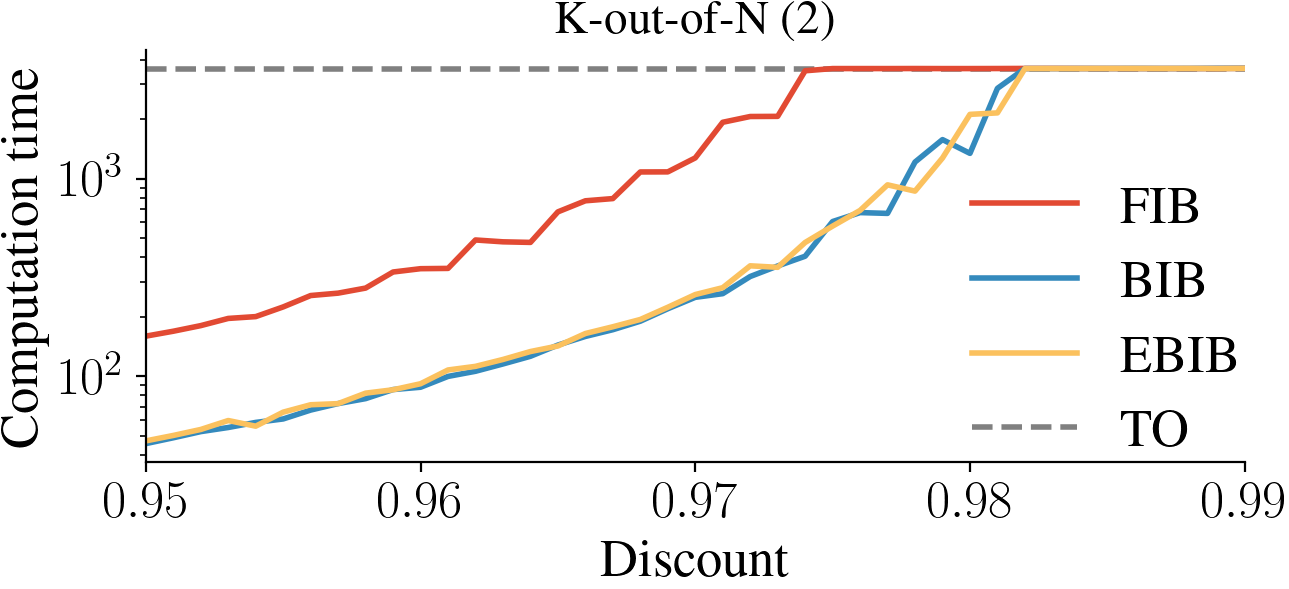

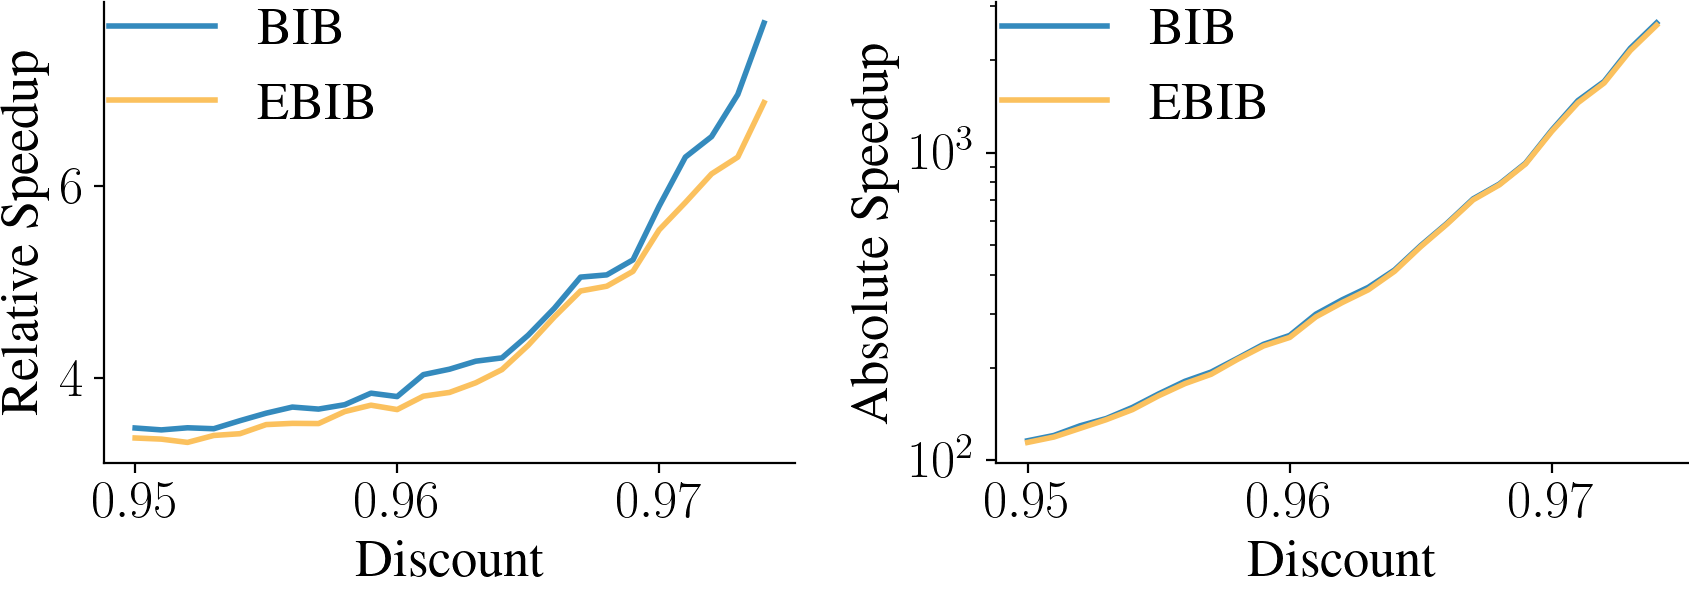

In [26]:
# K-out-of-N2
filename = "Data/Figures/DiscountTest_K-out-of-N2.pdf"
discounts = np.arange(0.95, 0.990, 0.001)
times, init_times, snames = get_data_discounts("K-out-of-N2", discounts)

solvernames = ["FIB", "BIB", "EBIB"]

plt.axhline(y=3600, label="TO", linestyle="--", color="0.5")

for (i,solver) in enumerate(solvernames):
    plt.plot(discounts,times[i], label=solver, color=colours[i], linestyle="-")

print(discounts[24])
print(times[0][24])
print(times[1][24])
print(times[2][24])

print(discounts[20])
print(times[0][20])
print(times[1][20])
print(times[2][20])

print(discounts[0])
print(times[0][0])
print(times[1][0])
print(times[2][0])

# Swithc TO to last on legend
handles, labels = plt.gca().get_legend_handles_labels()
to_index = labels.index("TO")
handles.append(handles.pop(to_index))
labels.append(labels.pop(to_index))

plt.yscale("log")
plt.xlabel("Discount")
plt.ylabel("Computation time")

plt.xlim(0.95, 0.99)
plt.legend(handles, labels, loc='best')
plt.title("K-out-of-N (2)")
plt.savefig(filename, transparent=True)
plt.show()

# cutoff = 16
cutoff = 16
for i in range(len(times)):
    times[i] = times[i][:-cutoff]

discounts = discounts[:-cutoff]


speedup_rel_BIB = savgol_filter(np.divide(times[0], times[1]), window_length=3, polyorder=0, mode="nearest")
speedup_rel_EBIB = savgol_filter(np.divide(times[0], times[2]), window_length=3, polyorder=0, mode="nearest")
speedup_abs_BIB = savgol_filter(np.subtract(times[0], times[1]), window_length=3, polyorder=0, mode="nearest")
speedup_abs_EBIB = savgol_filter(np.subtract(times[0], times[2]), window_length=3, polyorder=0, mode="nearest")
# speedup_rel_BIB = np.divide(times[0], times[1])
# speedup_rel_EBIB = np.divide(times[0], times[2])
# speedup_abs_BIB = np.subtract(times[0],times[1])
# speedup_abs_EBIB = np.subtract(times[0],times[2])
# plt.xlim(0.95, 0.974)
# plt.ylim(0,25)
# plt.plot(discounts,speedup_rel_BIB)#, color=colours[i], linestyle="-")
# plt.plot(discounts,speedup_rel_EBIB)#, color=colours[i], linestyle="-")
# plt.show()
# # plt.xlim(0.95, 0.974)
# # plt.ylim(0,1000)
# plt.plot(discounts,speedup_abs_BIB)#, color=colours[i], linestyle="-")
# plt.plot(discounts,speedup_abs_EBIB)#, color=colours[i], linestyle="-")
# # plt.yscale("log")
# plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.5), sharex=True)

# First subplot: Relative Speedup
# ax1.set_xlim(0.95, 1)
ax1.plot(discounts, speedup_rel_BIB, color=colours[1], linestyle="-", label="BIB")
ax1.plot(discounts, speedup_rel_EBIB, color=colours[2], linestyle="-", label="EBIB")
ax1.legend(loc="upper left")
# ax1.set_yscale("log")
ax1.set_xlabel("Discount")
ax1.set_ylabel("Relative Speedup")
# ax1.set_title("Relative Speedup vs Discount")  # Optional title for clarity

# Second subplot: Absolute Speedup
# ax2.set_xlim(0.95, 1)
ax2.plot(discounts, speedup_abs_BIB, color=colours[1], linestyle="-", label="BIB")
ax2.plot(discounts, speedup_abs_EBIB, color=colours[2], linestyle="-", label="EBIB")
ax2.legend(loc="upper left")
ax2.set_xlabel("Discount")
ax2.set_ylabel("Absolute Speedup")
ax2.set_yscale("log")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# ax2.spines['right'].set_position(('outward', 0))  # Move the right spine outwards to become the primary y-axis
# ax2.spines['left'].set_visible(False)  # Hide the left y-axis spine
# ax2.spines['right'].set_visible(True)
ax2.set_ylabel("Absolute Speedup")
# ax2.set_title("Absolute Speedup vs Discount")  # Optional title for clarity

# Adjust the layout so the plots don't overlap
plt.tight_layout()

# Save the figure if needed
plt.savefig("Data/Figures/DiscountTest_K-out-of-N2_speedup_subplots.pdf")

# Display the plots
plt.show()



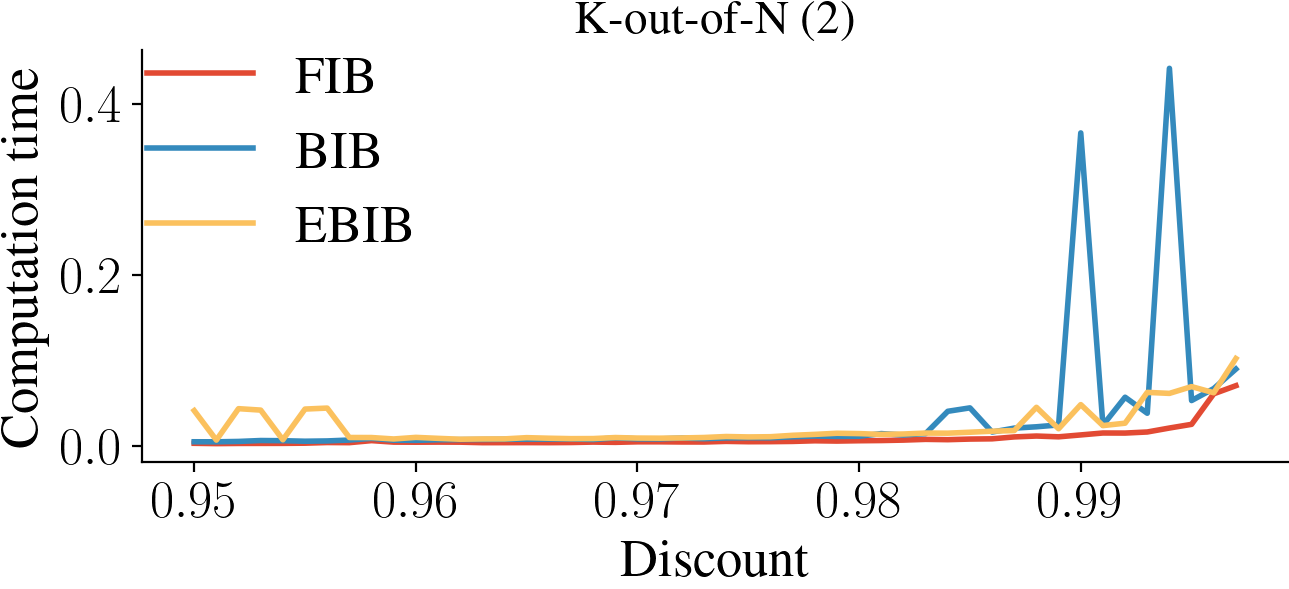

In [27]:
# K-out-of-N2
filename = "Data/Figures/DiscountTest_K-out-of-N2_heuristic.pdf"
discounts = np.arange(0.95, 0.998, 0.001)
times, init_times, snames = get_data_discounts("Tiger", discounts)

solvernames = ["FIB", "BIB", "EBIB"]

# plt.axhline(y=3600, label="TO", linestyle="--", color="0.5")

for (i,solver) in enumerate(solvernames):
    plt.plot(discounts[:-1],init_times[i][:-1], label=solver, color=colours[i], linestyle="-")

# Swithc TO to last on legend
handles, labels = plt.gca().get_legend_handles_labels()
# to_index = labels.index("TO")
# handles.append(handles.pop(to_index))
# labels.append(labels.pop(to_index))

# plt.yscale("log")
plt.xlabel("Discount")
plt.ylabel("Computation time")

# plt.xlim(0.95, 0.99)
plt.legend(handles, labels, loc='best')
plt.title("K-out-of-N (2)")
plt.savefig(filename, transparent=True)
plt.show()